El precio de un sistema de energía está dado por $$U=35A+208V$$
dónde A es la superficie del collector y V es el volumen de la bateria que almacena enegía, se debe considerar que: $$A\left(290-\frac{100}{V}\right)=583.3$$  Adicionalmente, el volumen de la bateria V está relacionado con la temperatura de operación del sistema $T$, y está configurada tal que $$V=\frac{50}{T-2O}$$ Los proveedores de batería unicamente proveen modelos que trabajen entre 40 y 90 grados centígrados. Se debe optimizar el costo U considerando todas las limitaciones presentadas

# Modelo de programacion

Minimizar $U=35A+208V$ 
> S.A $T\in [40,90]$

Podemos notar que el modelo depende de dos variables, sin embargo, dado el problema, podemo reducir hasta una sola variable, es decir:


## Modelo transformado

Minimizar $\dfrac{204165.5}{330-2T}+\dfrac{10400}{T-20}$ 
> S.A $T\in [40,90]$



In [41]:
import sympy

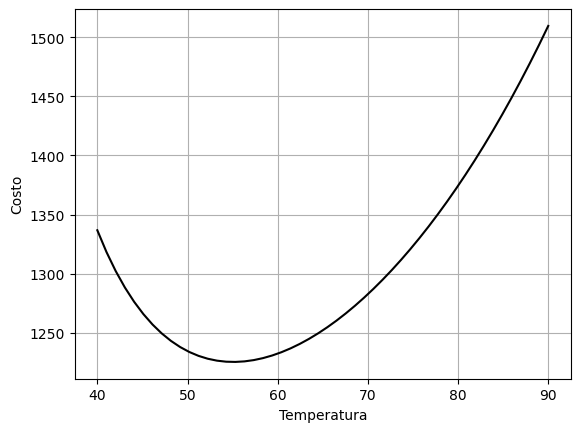

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def graficador(K,U):
    plt.figure()
    plt.plot(K,U,'k')
    plt.xlabel('Temperatura')
    plt.ylabel('Costo')
    plt.grid()
    plt.show()

a=40
b=90
K=np.linspace(a,b)

U=204165.5/(330-2*K)+10400/(K-20)
graficador(K,U)



In [42]:
from sympy import *
def cgradiente(fu):
    difU1=sympy.diff(fu)
    print(fu)
    print(difU1)

T=sympy.Symbol('T')
U=204165.5/(330-2*T)+10400/(T-20)


In [13]:
cgradiente(-10400/(T - 20)**2 + 408331.0/(330 - 2*T)**2)

-10400/(T - 20)**2 + 408331.0/(330 - 2*T)**2
20800/(T - 20)**3 + 1633324.0/(330 - 2*T)**3


Obtengamos las raices de $$U(t)=\dfrac{408331.0}{(330-2T)^2}-\dfrac{10400}{(T-20)^2}$$ 

In [43]:
T=Symbol('T')
solve(-10400/(T - 20)**2 + 408331.0/(330 - 2*T)**2)

[-47.9795750311863, 55.0835286102402]

Puesto que las restricciones del problema son $T\in[40,90]$ entonces tomamos la solución $T_0=55.0835286102402$

Puesto que, la segunda derivada siempre es positiva $\forall T \in [40,90]$ entonces podemos asegurar que $T_0$ es ún punto mínimo global de $U(T)$

In [44]:
#evaluamos

def f(T0):
    y=204165.5/(330-2*T0)+10400/(T0-20)
    return y

print(f(55.0835286102402))

1225.165636879001


Grafiquemos en python el punto que minimiza nuestra función de costos $U(T)$

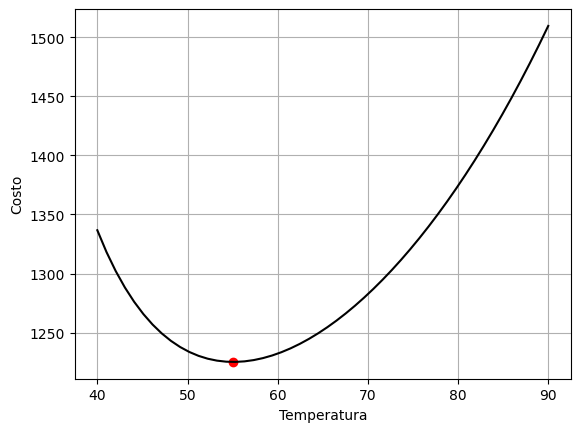

In [45]:
def graficador(K,U):
    plt.figure()
    plt.plot(K,U,'k')
    plt.xlabel('Temperatura')
    plt.ylabel('Costo')
    x=55.0835286102402
    y=1225.165636879001
    plt.scatter(x,y,color='red',label='Punto')
    plt.grid()
    plt.show()


T=np.linspace(40,90)
y=204165.5/(330-2*T)+10400/(T-20)
graficador(T,y)
    

# Método de Bisección

In [46]:
def U(T):
    return 10400/(T - 20) + 204165.5/(-2*T + 330)
def d1U(T):
    return -10400/(T - 20)**2 + 408331.0/(-2*T + 330)**2
def d2U(T):
    return 20800/(T - 20)**3 + 1633324.0/(330 - 2*T)**3

- Paso 1. Definir a,b,$\varepsilon$
- Paso 2  Calcular $\alpha=\dfrac{a+b}{2}$ y además $f'(a)$ y $f'(\alpha)$
    - si $f'(a)f'(\alpha)<0$
        - $b=\alpha$
    - caso contrario
        - a=$\alpha$
    - si $|a-b|>\varepsilon$
        - repetir paso 2
    - caso contrario
        - repertir paso 3
- Paso 3 Mostrar $a$ y $f(a)$

In [49]:
def biseccion():
    a = 40
    b = 90
    epsilon = 0.001
    
    cont = 0
    registro = []
    
    while(True):
        alpha = (a+b)/2
        
        # Primera derivada en a
        dU_a = d1U(a)
        
        #Primera derivada en alpha
        dU_alpha = d1U(alpha)
        
        if(dU_a*dU_alpha < 0):
            b = alpha
        else:
            a = alpha
            
        Ua = U(a)    
        
        # Condicion de finalizacion
        if(np.abs(a-b) < epsilon):
            print('-------------------------------------------------------------')
            print("It: {:02} - Temp: {:.10f} - Costo {:.10f}".format(cont, a, Ua))
            break
            
        cont = cont + 1
        registro.append([cont, a, Ua])
        print("It: {:02} - Temp: {:.10f} - Costo {:.10f}".format(cont, a, Ua))
        
    return registro

        
reg1 = biseccion()

It: 01 - Temp: 40.0000000000 - Costo 1336.6620000000
It: 02 - Temp: 52.5000000000 - Costo 1227.4022222222
It: 03 - Temp: 52.5000000000 - Costo 1227.4022222222
It: 04 - Temp: 52.5000000000 - Costo 1227.4022222222
It: 05 - Temp: 54.0625000000 - Costo 1225.5036361287
It: 06 - Temp: 54.8437500000 - Costo 1225.1839888051
It: 07 - Temp: 54.8437500000 - Costo 1225.1839888051
It: 08 - Temp: 55.0390625000 - Costo 1225.1662656061
It: 09 - Temp: 55.0390625000 - Costo 1225.1662656061
It: 10 - Temp: 55.0390625000 - Costo 1225.1662656061
It: 11 - Temp: 55.0634765625 - Costo 1225.1657646744
It: 12 - Temp: 55.0756835938 - Costo 1225.1656564351
It: 13 - Temp: 55.0817871094 - Costo 1225.1656378426
It: 14 - Temp: 55.0817871094 - Costo 1225.1656378426
It: 15 - Temp: 55.0833129883 - Costo 1225.1656368938
-------------------------------------------------------------
It: 15 - Temp: 55.0833129883 - Costo 1225.1656368938


# Método de Newton

## Pseudocódigo para el algorítmo de newton

* **Paso 1:** Definir: $a$, $b$, $x$, y $\epsilon$.
* **Paso 2:** Calcular: $f'(x)$ y $f''(x)$
    * **Almacenar** $x_{prev} = x$
    * **Actualizar** $x=x_{prev}-\frac{f'(x)}{f''(x)}$.
    * **if** $\lvert x-x_{prev}\lvert > \epsilon$.
        * **entonces** repetir Paso 2.
        * **e.o.c** repetir Paso 3.
* **Paso 3:** Convergió: Imprimir $x$ y $f(x)$.

In [50]:
def NewtonRaphson():
    a, b = 40, 90
    x = 90
    epsilon = 0.001
    
    cont = 0
    registro = []
    
    while True:
        # Calculo de f'(x) y f''(x)
        d1U_x = d1U(x)
        d2U_x = d2U(x)
        
        xprev = x
        x = xprev - d1U_x/d2U_x
        
        U_x = U(x)
        
        cont = cont + 1
        registro.append([cont, x, U_x])
        
        print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(cont, x, U_x))
        
        if(np.abs(x - xprev) <= epsilon):
            print("----------------------------------------------------------------")
            print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(cont, x, U_x))
            break
        
    return registro

In [62]:
reg = NewtonRaphson()

It: 01 - Temp: 60.5730595536 - Costo: 1233.8795849955
It: 02 - Temp: 54.3709476178 - Costo: 1225.3292441409
It: 03 - Temp: 55.0684488875 - Costo: 1225.1657091464
It: 04 - Temp: 55.0835219881 - Costo: 1225.1656368790
It: 05 - Temp: 55.0835286102 - Costo: 1225.1656368790
----------------------------------------------------------------
It: 05 - Temp: 55.0835286102 - Costo: 1225.1656368790


## Convergencia del método

In [51]:
def evaluacion(reg):
    reg = np.array(reg)
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    
    fig.suptitle('Analisis de convergencia')
    
    axs[0].axhline(55.08, color='k', linewidth=3, linestyle='--')
    axs[0].plot(reg[:, 0], reg[:, 1], linewidth=4)
    axs[0].set_xlabel('Iteraciones')
    axs[0].set_ylabel('Temperatura')
    axs[0].grid()
    axs[0].set_xlim([0, 15])
    
    axs[1].axhline(1225.17, color='k', linewidth=3, linestyle='--')
    axs[1].plot(reg[:, 0], reg[:, 2], linewidth=4)
    axs[1].set_xlabel('Iteraciones')
    axs[1].set_ylabel('Costo')
    axs[1].grid()
    axs[1].set_xlim([0, 15])
    
    plt.show()

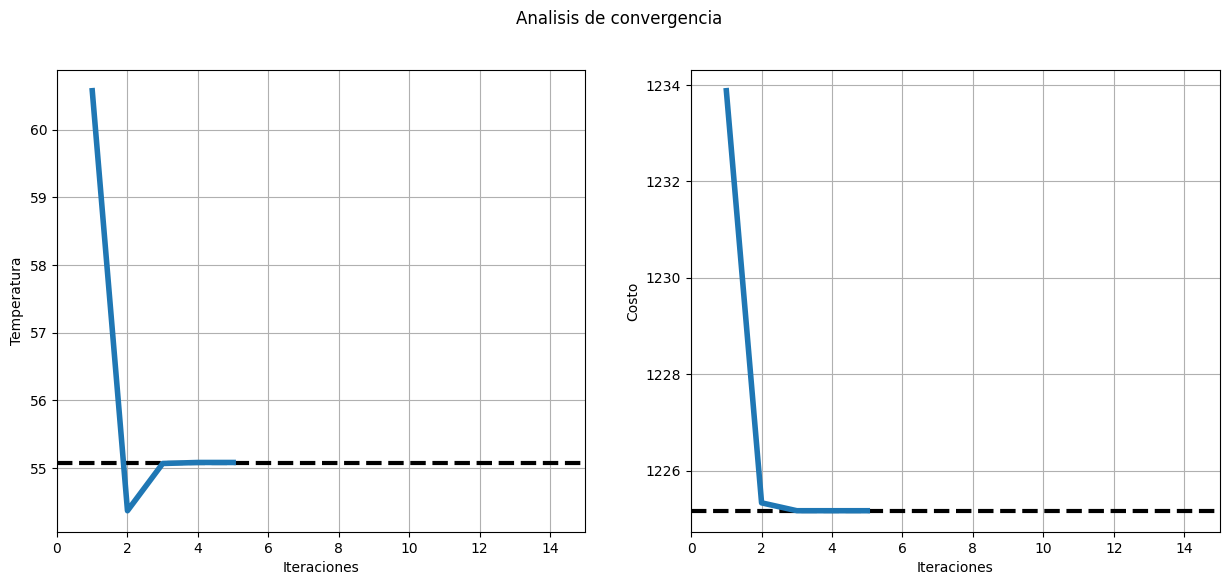

In [65]:
evaluacion(reg)

# Método de la secante

# Algoritmo del método de la Secante

* **Paso 1:** Definir: $a$, $b$ y $\epsilon$
* **Paso 2:** Calcular: $\alpha = x_2 - \frac{f'(x_2)}{(f'(x_2)-f'(x_1))/(x_2-x_1)}$
    * **if** $f'(\alpha) > 0 $
        * **entonces** $b=\alpha$
        * **e.o.c** $a=\alpha$
    * **if** $\lvert f'(\alpha)\lvert > \epsilon $
        * **entonces** repetir Paso 2
        * **e.o.c** repetir Paso 3
* **Paso 3:** Convergió: Imprimir $\alpha$ y $f(\alpha)$.

In [53]:
def Secante():
    a, b = 40, 90
    epsilon = 0.01
    
    cont = 0
    registro = []
    
    while True:
        # calcular f'(a)
        dU_a = d1U(a)
        
        # calcular f'(b
        dU_b= d1U(b)
        
        # calcular alpha
        alpha = b - dU_b / ((dU_b - dU_a)/(b - a))
        
        dU_alpha = d1U(alpha)
        
        if dU_alpha > 0:
            b = alpha
        else:
            a = alpha
            
        U_alpha = U(alpha)
        
        cont = cont + 1
        
        registro.append([cont, alpha, U_alpha])
        print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(cont, alpha, U_alpha))
        
        if np.abs(dU_alpha) <= epsilon:
            print("------------------------------------------------------------------------")
            print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(cont, alpha, U_alpha))
            break
            
    return registro

In [56]:
reg = Secante()

It: 01 - Temp: 67.4238416410 - Costo: 1265.4843547060
It: 02 - Temp: 60.8827888776 - Costo: 1234.8456727508
It: 03 - Temp: 57.9389356280 - Costo: 1227.6249518474
It: 04 - Temp: 56.5132183316 - Costo: 1225.7978324621
It: 05 - Temp: 55.8045366165 - Costo: 1225.3285410968
It: 06 - Temp: 55.4483617340 - Costo: 1225.2076290459
It: 07 - Temp: 55.2684366108 - Costo: 1225.1764608953
It: 08 - Temp: 55.1773211286 - Costo: 1225.1684267004
It: 09 - Temp: 55.1311231215 - Costo: 1225.1663559004
It: 10 - Temp: 55.1076851354 - Costo: 1225.1658221870
It: 11 - Temp: 55.0957904902 - Costo: 1225.1656846363
------------------------------------------------------------------------
It: 11 - Temp: 55.0957904902 - Costo: 1225.1656846363


# Evaluación del método

Vamos a plotear el proceso de evolución que el algoritmo siguió para encontrar el mínimo.

In [57]:
def Evaluacion(reg):
    reg1 = np.array(reg)
    fig, axs = plt.subplots(1,2, figsize=(15, 4))

    fig.suptitle('Convergencia')

    axs[0].axhline(55.08, color='k' , linewidth=3, linestyle='--')
    axs[0].plot(reg1[:, 0], reg1[:,1], linewidth=4)
    axs[0].set_xlabel('Iteraciones')
    axs[0].set_ylabel('Temperatura')
    axs[0].grid()
    axs[0].set_xlim([0, 15])

    axs[1].axhline(1225.17, color='k' , linewidth=3, linestyle='--')
    axs[1].plot(reg1[:, 0], reg1[:,2], linewidth=4)
    axs[1].set_xlabel('Iteraciones')
    axs[1].set_ylabel('Costo')
    axs[1].grid()
    axs[1].set_xlim([0, 15])

    plt.show()
    
    return None

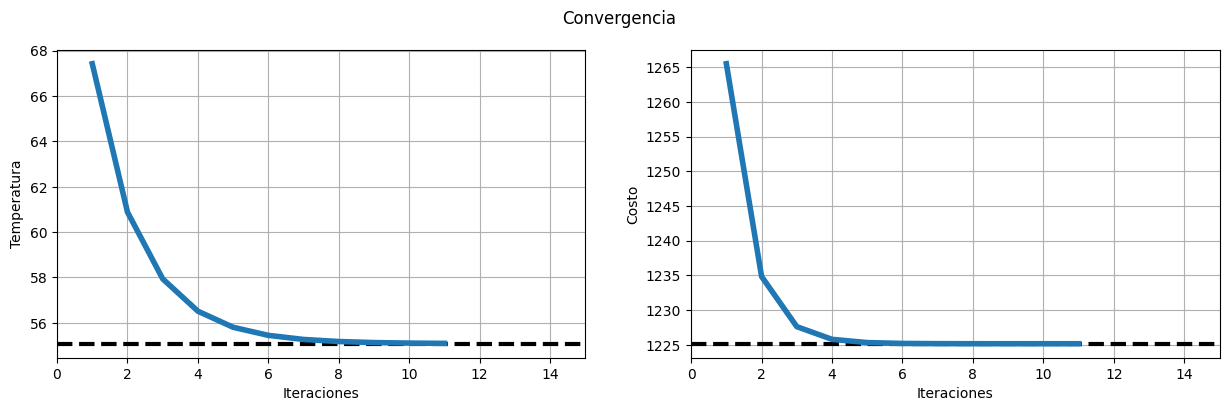

In [58]:
Evaluacion(reg)

# Algoritmo de la búsqueda de la sección dorada

* **Paso 1:** Definir: $a$, $b$, $\epsilon$ y $\tau$
* **Paso 2:** Actualizar parámetros de búsqueda:
    * $\alpha_1 = a(1-\tau) +b\tau$ 
    * $\alpha_2 = a\tau + b(1-\tau)$
* **Paso 3:** Comparar:
    * **if** $f(\alpha_1) > f(\alpha_2)$
        * **entonces** $a=\alpha_1$
        * **e.o.c** $b=\alpha_2$
* **Paso 4:** Terminar ciclo iterativo usando:
    * **if** $\lvert f(\alpha_1) - f(\alpha_2)\lvert > \epsilon$
        * **entonces** repetir Paso 2
        * **e.o.c** repetir Paso 5
* **Paso 5:** Imprimir $\alpha_1$ y $f(\alpha_1)$

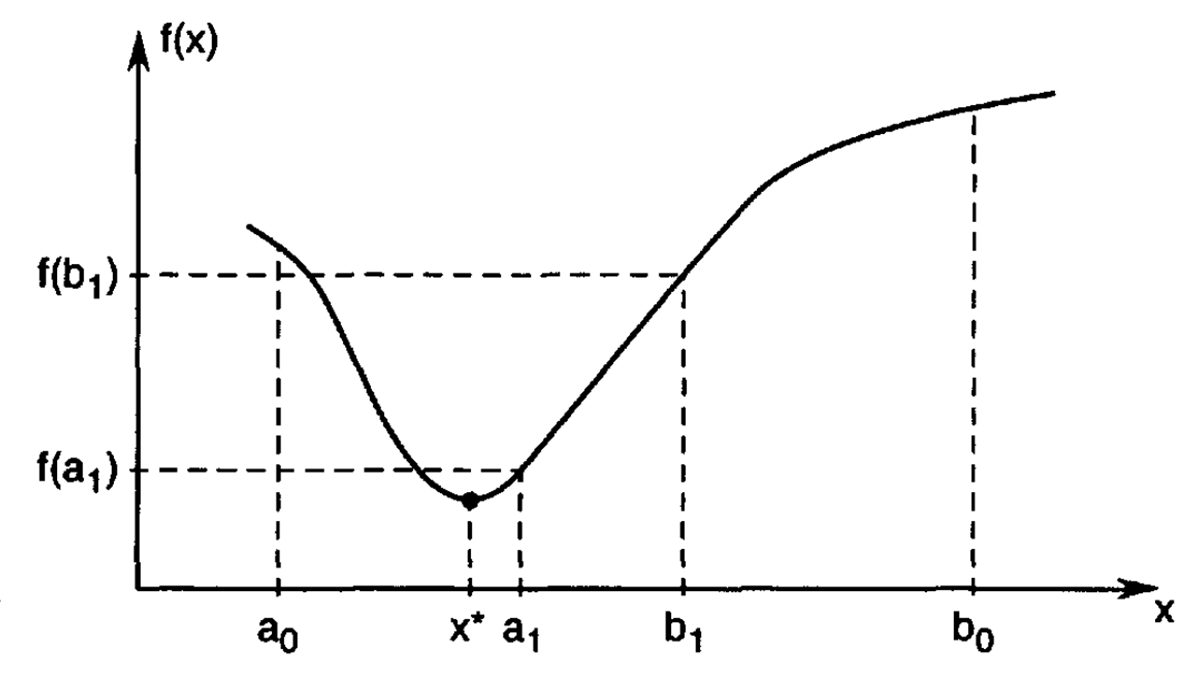

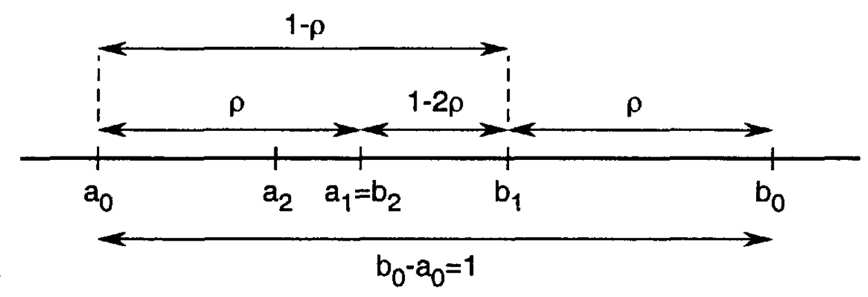

In [59]:
def GoldenSectionSearch():
    a = 40
    b = 90
    tau = 2 - 1.618033988
    epsilon = 1e-6

    cont = 0
    registro = []

    while(True):
        # Calcular alpha1 y alpha2
        alpha1 = a*(1 - tau) + b*tau
        alpha2 = a*tau + b*(1 - tau)

        # Calcular f(alpha1) y f(alpha2)
        U_alpha1 = U(alpha1)
        U_alpha2 = U(alpha2)
        
        if(U_alpha1 > U_alpha2):
            a = alpha1
        else:
            b = alpha2       

        cont = cont + 1
        registro.append([cont, alpha1, U_alpha1])
        print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(cont, alpha1, U_alpha1))

        if(np.abs(U_alpha1 - U_alpha2) < epsilon):
            print("-------------------------------------------------------")
            print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(cont, alpha1, U_alpha1))
            break
            
    return registro

In [60]:
reg = GoldenSectionSearch()

It: 01 - Temp: 59.0983006000 - Costo: 1229.9349492485
It: 02 - Temp: 51.8033988838 - Costo: 1228.8272286583
It: 03 - Temp: 47.2949016841 - Costo: 1248.2990547072
It: 04 - Temp: 51.8033988640 - Costo: 1228.8272287042
It: 05 - Temp: 54.5898033560 - Costo: 1225.2438371423
It: 06 - Temp: 53.5254915444 - Costo: 1225.9614290421
It: 07 - Temp: 54.5898033514 - Costo: 1225.2438371437
It: 08 - Temp: 55.2475842219 - Costo: 1225.1741606847
It: 09 - Temp: 54.9963342860 - Costo: 1225.1680564676
It: 10 - Temp: 54.8410532861 - Costo: 1225.1844049161
It: 11 - Temp: 54.9963342853 - Costo: 1225.1680564676
It: 12 - Temp: 55.0923032205 - Costo: 1225.1656613364
It: 13 - Temp: 55.0556463491 - Costo: 1225.1658840058
It: 14 - Temp: 55.0923032203 - Costo: 1225.1656613364
It: 15 - Temp: 55.0783015414 - Costo: 1225.1656455604
It: 16 - Temp: 55.0696480279 - Costo: 1225.1656981086
It: 17 - Temp: 55.0783015414 - Costo: 1225.1656455604
It: 18 - Temp: 55.0836497068 - Costo: 1225.1656368837
It: 19 - Temp: 55.0816068894

## Evaluación del método

In [61]:
def Evaluacion(reg):
    reg1 = np.array(reg)
    fig, axs = plt.subplots(1,2, figsize=(15, 4))

    fig.suptitle('Convergencia')

    axs[0].axhline(55.08, color='k' , linewidth=3, linestyle='--')
    axs[0].plot(reg1[:, 0], reg1[:,1], linewidth=4)
    axs[0].set_xlabel('Iteraciones')
    axs[0].set_ylabel('Temperatura')
    axs[0].grid()
    axs[0].set_xlim([0, 15])

    axs[1].axhline(1225.17, color='k' , linewidth=3, linestyle='--')
    axs[1].plot(reg1[:, 0], reg1[:,2], linewidth=4)
    axs[1].set_xlabel('Iteraciones')
    axs[1].set_ylabel('Costo')
    axs[1].grid()
    axs[1].set_xlim([0, 15])

    plt.show()
    
    return None

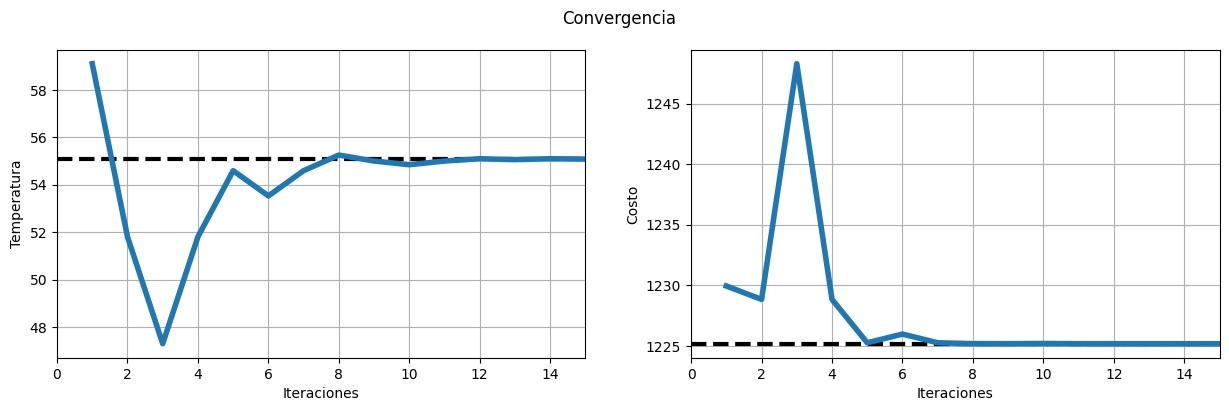

In [64]:
Evaluacion(reg)

# Algoritmo del método de Fibonacci

* **Paso 1:** Definir: $n$.
* **Paso 2:** Calcular la serie de Fibonacci con $n$ valores. 
* **Paso 3:** Definir: $a$, $b$, $L$, $k=2$ y $\epsilon$
* **Paso 4:** Calcular: $L_k^*$, $x_a$, $x_b$, $f(x_a)$, $f(x_b)$
* **Paso 5:** **if** $f(x_a) > f(x_b)$
    * **entonces** $a = x_a$
    * **e.o.c** $b = x_b$
* **Paso 6:** Incrementar $k = k + 1$
* **Paso 7:** **if** $\vert a-b\vert > \epsilon$
    * **entonces** repetir Paso 4
    * **e.o.c** repetir Paso 8
* **Paso 8:** Imprimir $x_a$ y $f(x_a)$

### Algorítmo recursivo

In [65]:
def Fibonacci(*params):
    a   = params[0]
    b   = params[1]
    k   = params[2]
    it  = params[3]
    reg = params[4]
    L   = params[5]
    n   = params[6]
    fs  = params[7]
    ep  = params[8]

    i_arriba = n - k + 1 
    i_abajo = n + 1
    Lk = L*fs[i_arriba]/fs[i_abajo]

    xa = a + Lk
    xb = b - Lk

    U_xa = U(xa)
    U_xb = U(xb)

    if(U_xa > U_xb):
        a = xa
    else:
        b = xb
        
    if(np.abs(U_xa-U_xb) > ep):
        k = k + 1
        it = it + 1
        
        reg.append([it, xa, U_xa])
        print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(it, xa, U_xa))
    
        return Fibonacci(a, b, k, it, reg, L, n, fs, ep)
    else:
        print("-------------------------------------------------------")
        print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(it, xa, U_xa))
        
        return reg

In [66]:
def RunFibonacci():
    n = 30
    
    fs = [1, 1]
    for i in range(n):
        aux = fs[-1] + fs[-2]
        fs.append(aux)
    
    a, b, k = 40, 90, 2
    L = b - a
    
    return Fibonacci(a, b, k, 0, [], b-a, n, fs, 1e-6)

In [67]:
reg = RunFibonacci()
print(reg)

It: 01 - Temp: 59.0983005625 - Costo: 1229.9349491623
It: 02 - Temp: 51.8033988750 - Costo: 1228.8272286788
It: 03 - Temp: 47.2949016875 - Costo: 1248.2990546850
It: 04 - Temp: 51.8033988750 - Costo: 1228.8272286788
It: 05 - Temp: 54.5898033750 - Costo: 1225.2438371362
It: 06 - Temp: 53.5254915625 - Costo: 1225.9614290233
It: 07 - Temp: 54.5898033750 - Costo: 1225.2438371362
It: 08 - Temp: 55.2475842500 - Costo: 1225.1741606876
It: 09 - Temp: 54.9963343125 - Costo: 1225.1680564661
It: 10 - Temp: 54.8410533125 - Costo: 1225.1844049120
It: 11 - Temp: 54.9963343125 - Costo: 1225.1680564661
It: 12 - Temp: 55.0923032499 - Costo: 1225.1656613366
It: 13 - Temp: 55.0556463752 - Costo: 1225.1658840054
It: 14 - Temp: 55.0923032499 - Costo: 1225.1656613366
It: 15 - Temp: 55.0783015633 - Costo: 1225.1656455603
It: 16 - Temp: 55.0696480619 - Costo: 1225.1656981083
It: 17 - Temp: 55.0783015633 - Costo: 1225.1656455603
It: 18 - Temp: 55.0836497485 - Costo: 1225.1656368837
It: 19 - Temp: 55.0816068795

## Evaluación del método

In [68]:
def Evaluacion(reg):
    reg1 = np.array(reg)
    fig, axs = plt.subplots(1,2, figsize=(15, 4))

    fig.suptitle('Convergencia')

    axs[0].axhline(55.08, color='k' , linewidth=3, linestyle='--')
    axs[0].plot(reg1[:, 0], reg1[:,1], linewidth=4)
    axs[0].set_xlabel('Iteraciones')
    axs[0].set_ylabel('Temperatura')
    axs[0].grid()
    axs[0].set_xlim([0, 15])

    axs[1].axhline(1225.17, color='k' , linewidth=3, linestyle='--')
    axs[1].plot(reg1[:, 0], reg1[:,2], linewidth=4)
    axs[1].set_xlabel('Iteraciones')
    axs[1].set_ylabel('Costo')
    axs[1].grid()
    axs[1].set_xlim([0, 15])

    plt.show()
    
    return None

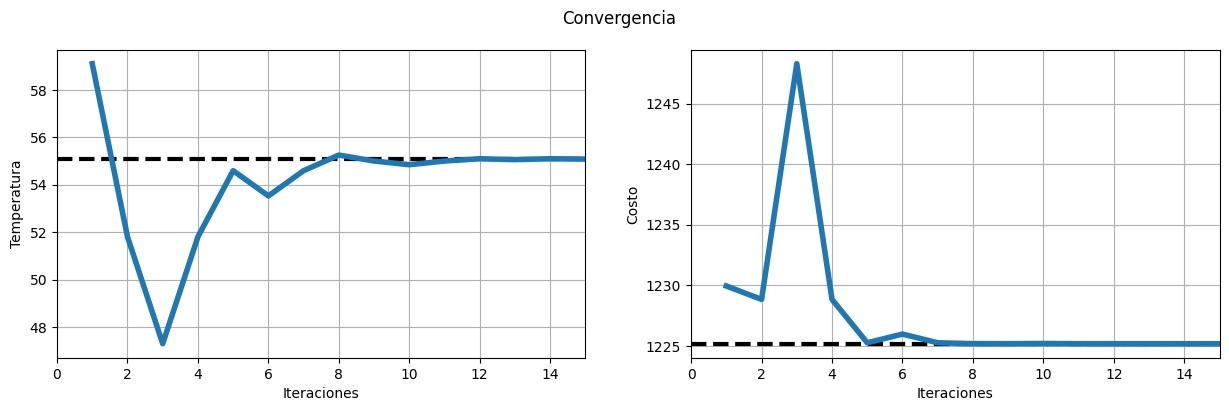

In [69]:
Evaluacion(reg)

# *ANALISIS DE RENDIMIENTO CON LAS FUNCIONES PROPUESTAS EN EL PAPER DE Dezdemona Gjylapi*

Se realizará el análisis de renidmiento sobre dos categorias de funciones, **funciones continuas y no continuas**, es decir:

#### Funciones continuas
> $f_1(x) =-\dfrac{x^6}{60} - \dfrac{x^5}{50} + \dfrac{x^4}{2} + \dfrac{2x^3}{3} - 3.2x^2 - 6.4x$

>$f_2(x) = -\frac{x^6 + x^5 - 10x^2 - 10x - 12}{x^2 + 6}$

>$f_3(x) =5-\sqrt{x^4 + 2x^3 - 3x^2 + 13}$

>$f_4(x) = \sin^2(3x + 45) + 0.9\sin^3(9x) - \sin(15x + 50)\cos(2x - 30)$

#### Funciones no continuas

> $g_1(x) = \frac{\sin(2\pi x)}{x} - \frac{\cos(3\pi x)}{x}$

> $g_2(x) = \frac{2x - 1}{x^2}$

> $g_3(x) = -x^4 (\log |x| - 1)$ 

> $g_4(x) = e^{-x} (\log |x| + \frac{x}{|x|})$


# Inicialización de las funciones

In [71]:
import numpy as np
from sympy import *

In [70]:
def cgradiente(fu):
    difU1=sympy.diff(fu)
    print(fu)
    print(difU1)
    
x = sympy.Symbol('x',real=True)
    
# funciones continuas
f1 = -x**6/60 - x**5/50 + x**4/2 + 2*x**3/3 - 3.2*x**2 - 6.4*x
f2 = -(x**6 + x**5 - 10*x**2 - 10*x - 12)/(x**2 + 6)
f3 = 5 - sympy.sqrt(x**4 + 2*x**3 - 3*x**2 + 13)
f4 = sympy.sin(3*x + 45)**2 + 0.9*sympy.sin(9*x)**3 - sympy.sin(15*x + 50)*sympy.cos(2*x - 30)

# funciones no continuas
g_1 = sympy.sin(2*sympy.pi*x)/x - sympy.cos(3*sympy.pi*x)/x
g_2 = (2*x - 1)/x**2
g_3 = -x**4*(sympy.log(sympy.Abs(x)) - 1)
g_4 = sympy.exp(-x)*(sympy.log(sympy.Abs(x)) + x/sympy.Abs(x))

In [72]:
def biseccion(U, d1U, a, b, epsilon=0.001):
    cont = 0
    registro = []
    while True:
        alpha = (a + b) / 2

        # Primera derivada en a
        dU_a = d1U.subs(x, a).evalf()

        # Primera derivada en alpha
        dU_alpha = d1U.subs(x, alpha).evalf()
        if dU_a * dU_alpha < 0:
            b = alpha
        else:
            a = alpha

        Ua = U.subs(x, a).evalf()

        # Condición de finalización
        if np.abs(a - b) < epsilon:
            print('-------------------------------------------------------------')
            break

        cont += 1
        registro.append([cont, a, Ua])
        print("It: {:02} - X: {:.10f} - Y {:.10f}".format(cont, a, Ua))

    return registro

In [81]:
# Derivadas de las funciones continuas
df1 = sympy.diff(f1, x)
df2 = sympy.diff(f2, x)
df3 = sympy.diff(f3, x)
df4 = sympy.diff(f4, x)

dg_1 = sympy.diff(g_1, x)
dg_2 = sympy.diff(g_2, x)
dg_3 = sympy.simplify(sympy.diff(g_3)).as_real_imag()[0]
dg_4 = sympy.simplify(sympy.diff(g_4)).as_real_imag()[0]


# Aplicar la función de bisección a diferentes funciones
reg1 = biseccion(f1, df1, -20, 20)
reg2 = biseccion(f2, df2, -20, 20)
reg3 = biseccion(f3, df3, -4, 2)
reg4 = biseccion(f4, df4, 3, 4) #No hay buenos resultados

reg_g1 = biseccion(g_1, dg_1, 1, 2) #Encuentra máximos locales
reg_g2 = biseccion(g_2, dg_2, 0.5, 2)
reg_g3 = biseccion(g_3, dg_3, 2.4, 2)
reg_g4 = biseccion(g_4, dg_4, 0.1, 2)


It: 01 - X: -20.0000000000 - Y -929152.0000000000
It: 02 - X: -10.0000000000 - Y -10589.3333333333
It: 03 - X: -5.0000000000 - Y -16.7500000000
It: 04 - X: -5.0000000000 - Y -16.7500000000
It: 05 - X: -5.0000000000 - Y -16.7500000000
It: 06 - X: -4.3750000000 - Y 9.2879673640
It: 07 - X: -4.0625000000 - Y 11.8877322823
It: 08 - X: -4.0625000000 - Y 11.8877322823
It: 09 - X: -4.0625000000 - Y 11.8877322823
It: 10 - X: -4.0234375000 - Y 11.9386165266
It: 11 - X: -4.0039062500 - Y 11.9464462957
It: 12 - X: -4.0039062500 - Y 11.9464462957
It: 13 - X: -4.0039062500 - Y 11.9464462957
It: 14 - X: -4.0014648438 - Y 11.9466357337
It: 15 - X: -4.0002441406 - Y 11.9466658082
-------------------------------------------------------------
It: 01 - X: 0.0000000000 - Y 2.0000000000
It: 02 - X: 0.0000000000 - Y 2.0000000000
It: 03 - X: 0.0000000000 - Y 2.0000000000
It: 04 - X: 0.0000000000 - Y 2.0000000000
It: 05 - X: 0.0000000000 - Y 2.0000000000
It: 06 - X: 0.6250000000 - Y 3.4427427558
It: 07 - X: 0

In [152]:
def eval(reg,objx,objy):
    regx = np.array(reg)
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    
    fig.suptitle('Analisis de convergencia')
    
    axs[0].axhline(objx, color='k', linewidth=3, linestyle='--')
    axs[0].plot(regx[:, 0], regx[:, 1], linewidth=4)
    axs[0].set_xlabel('Iteraciones')
    axs[0].set_ylabel('Valor objetivo')
    axs[0].grid()
    axs[0].set_xlim([0, 15])
    
    axs[1].axhline(objy, color='k', linewidth=3, linestyle='--')
    axs[1].plot(regx[:, 0], regx[:, 2], linewidth=4)
    axs[1].set_xlabel('Iteraciones')
    axs[1].set_ylabel('Y')
    axs[1].grid()
    axs[1].set_xlim([0, 15])
    
    plt.show()


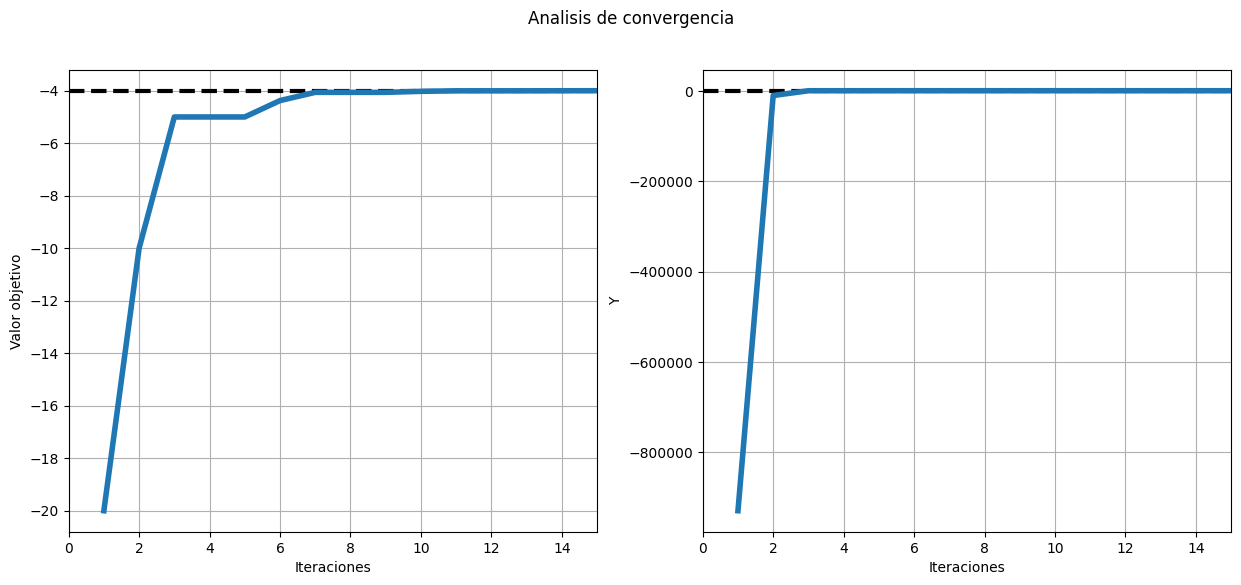

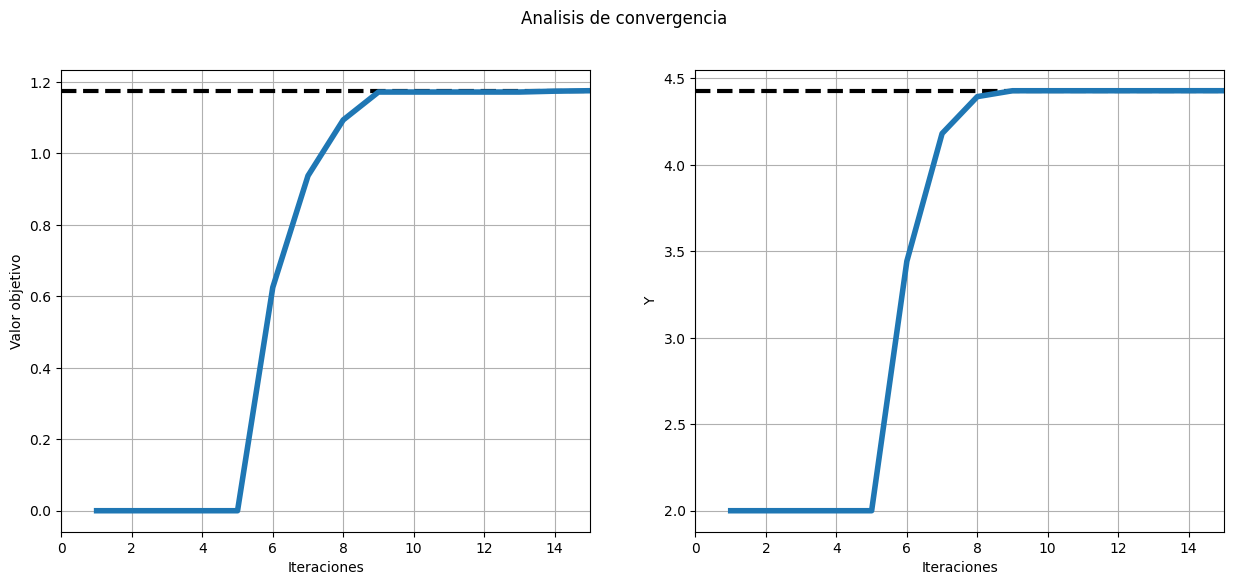

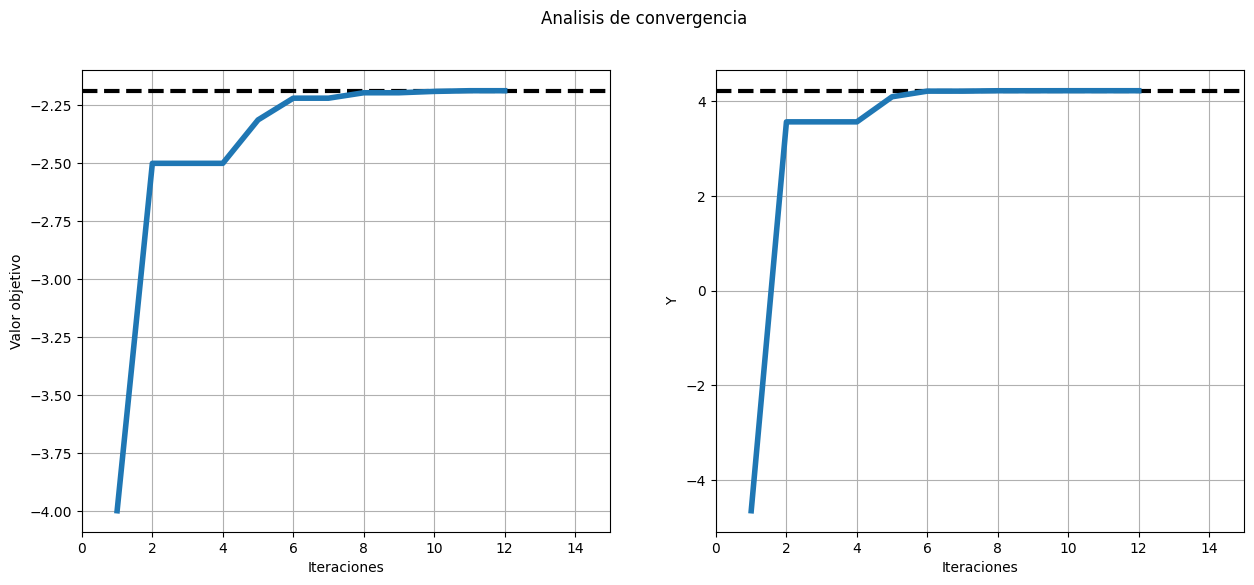

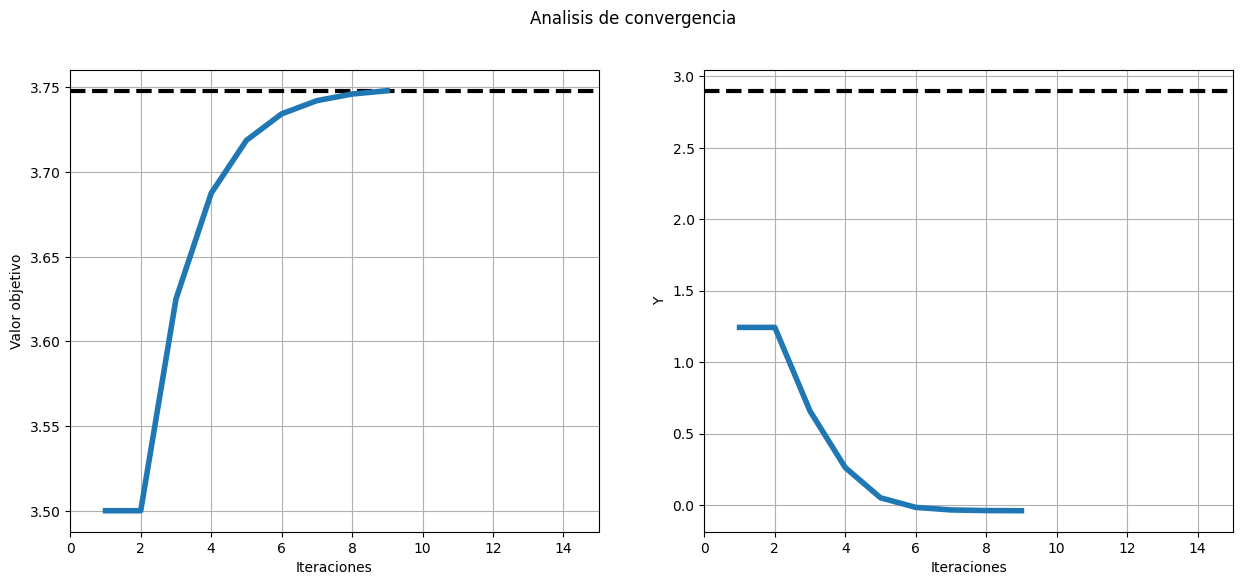

In [153]:
eval(reg1,reg1[-1][1],reg1[-1][2])
eval(reg2,reg2[-1][1],reg2[-1][2])
eval(reg3,reg3[-1][1],reg3[-1][2])
eval(reg4,reg4[-1][1],2.9)

Como podemos ver, el método de bisección no funcionó para la función trigonométrica $g_3$, pues eata función "oscila bastante" por lo cual, solo podemos encontar máximos locates dado un subconjunto de su dominio

# Método de newton

In [161]:
#Calculamos las segundas derivadas
sdf1 = sympy.diff(df1, x)
sdf2 = sympy.diff(df2, x)
sdf3 = sympy.diff(df3, x)
sdf4 = sympy.diff(df4, x)


sdg_1 = sympy.diff(dg_1, x)
sdg_2 = sympy.diff(dg_2, x)
sdg_3 = sympy.simplify(sympy.diff(dg_3)).as_real_imag()[0]
sdg_4 = sympy.simplify(sympy.diff(dg_4)).as_real_imag()[0]


In [154]:
def NewtonRaphson(U, d1U, d2U, x0, epsilon=1e-6, max_iter=100):
    x = x0
    cont = 0
    registro = []
    
    # Definir la variable simbólica
    x_sym = sympy.symbols('x')

    # Convertir las expresiones a funciones
    U_func = sympy.lambdify(x_sym, U, 'numpy')
    d1U_func = sympy.lambdify(x_sym, d1U, 'numpy')
    d2U_func = sympy.lambdify(x_sym, d2U, 'numpy')

    while cont < max_iter:
        # Calcular f'(x) y f''(x)
        d1U_x = d1U_func(x)
        d2U_x = d2U_func(x)
        
        xprev = x
        x = xprev - d1U_x / d2U_x
        
        U_x = U_func(x)
        
        cont += 1
        registro.append([cont, x, U_x])
        
        print("It: {:02d} - X: {:.10f} - Y: {:.10f}".format(cont, x, U_x))
        
        if abs(x - xprev) <= epsilon:
            print("----------------------------------------------------------------")
            break
        
    return registro

In [172]:
vi_f1=20
vi_f2=20
vi_f3=20
vi_f4=20
vi_f5=20
vi_f6=5

In [173]:
reg1_MN=NewtonRaphson(f1, df1, sdf1, vi_f1) 
reg2_MN=NewtonRaphson(f2, df2, sdf2, vi_f2) 
reg3_MN=NewtonRaphson(f3, df3, sdf3, vi_f3) 
reg4_MN=NewtonRaphson(f4, df4, sdf4, vi_f4)

#funciones discontinuas

reg5_MN=NewtonRaphson(g_1, dg_1, sdg_1, vi_f5)
reg6_MN=NewtonRaphson(g_2, dg_2, sdg_2, vi_f6)



It: 01 - X: 16.0442383161 - Y: -270595.3545600559
It: 02 - X: 12.9016662455 - Y: -69343.5697280945
It: 03 - X: 10.4157971217 - Y: -17509.0007141841
It: 04 - X: 8.4634280798 - Y: -4307.5977351519
It: 05 - X: 6.9488167141 - Y: -1009.9084759826
It: 06 - X: 5.7994880748 - Y: -214.4361430011
It: 07 - X: 4.9635330045 - Y: -35.0784939941
It: 08 - X: 4.4074016984 - Y: -0.0485424327
It: 09 - X: 4.1070932337 - Y: 4.8247378039
It: 10 - X: 4.0099600651 - Y: 5.1176034147
It: 11 - X: 4.0000970924 - Y: 5.1199997737
It: 12 - X: 4.0000000093 - Y: 5.1200000000
It: 13 - X: 4.0000000000 - Y: 5.1200000000
----------------------------------------------------------------
It: 01 - X: 13.2856603478 - Y: -32388.5873446990
It: 02 - X: 8.8277023159 - Y: -6266.9492423688
It: 03 - X: 5.8833866383 - Y: -1184.4385777877
It: 04 - X: 3.9608011497 - Y: -213.3580534831
It: 05 - X: 2.7304406005 - Y: -33.6136896238
It: 06 - X: 1.9622669943 - Y: -1.6297704774
It: 07 - X: 1.5013295453 - Y: 3.6920807235
It: 08 - X: 1.26243091

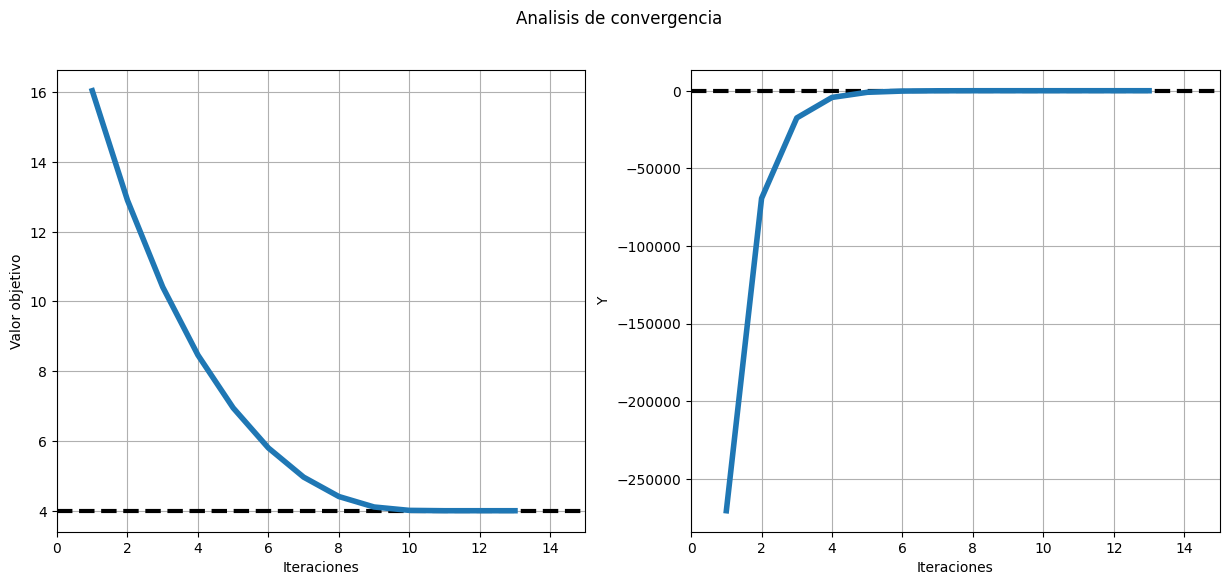

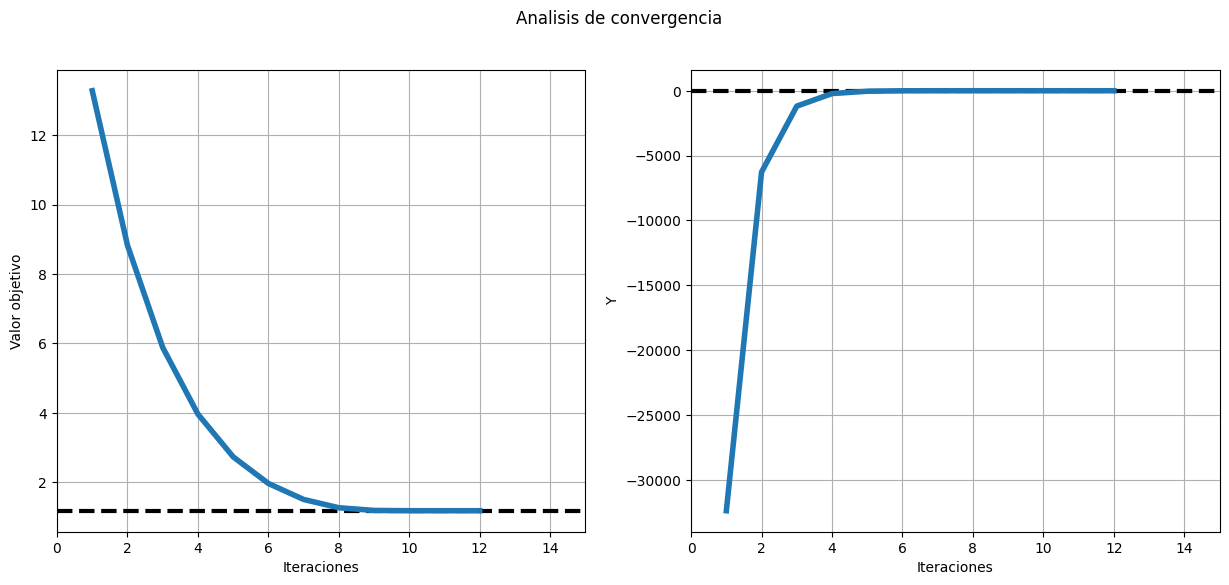

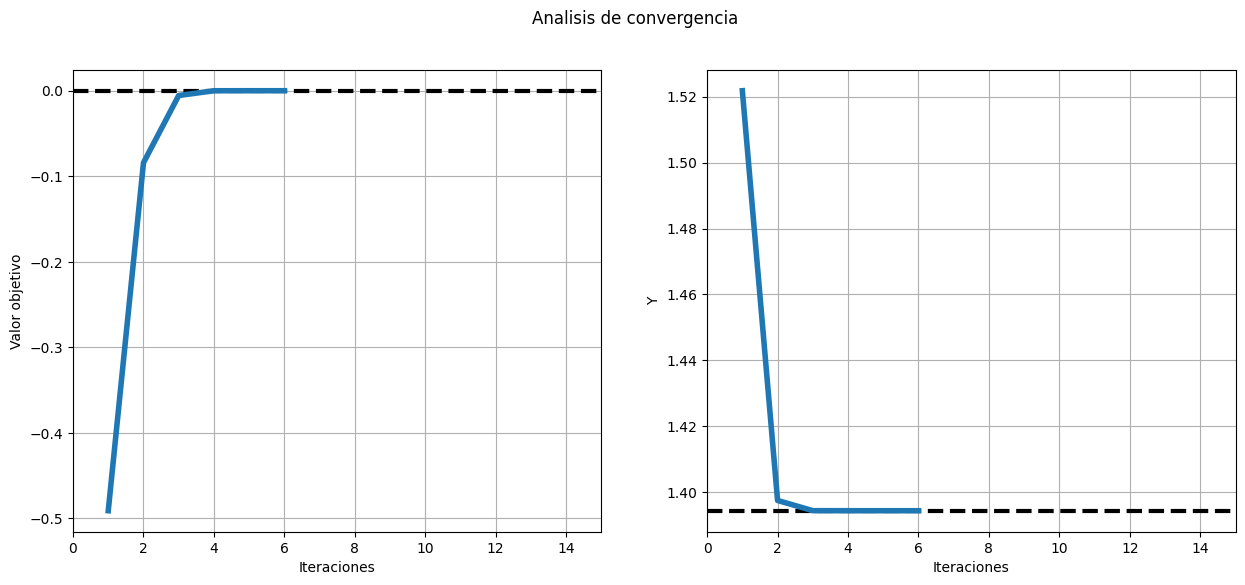

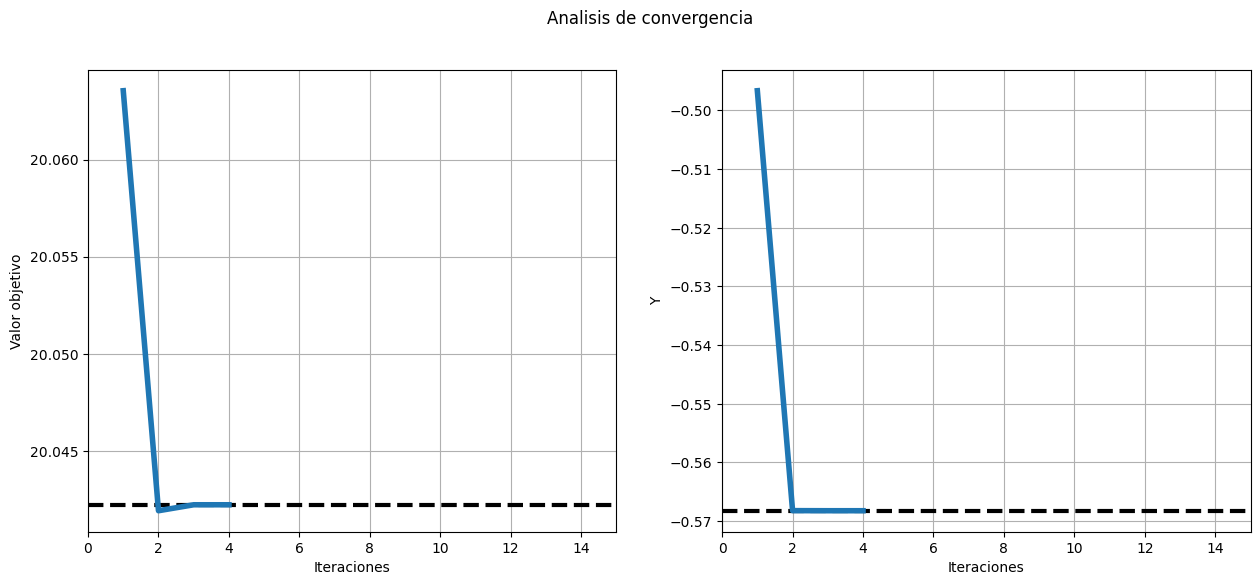

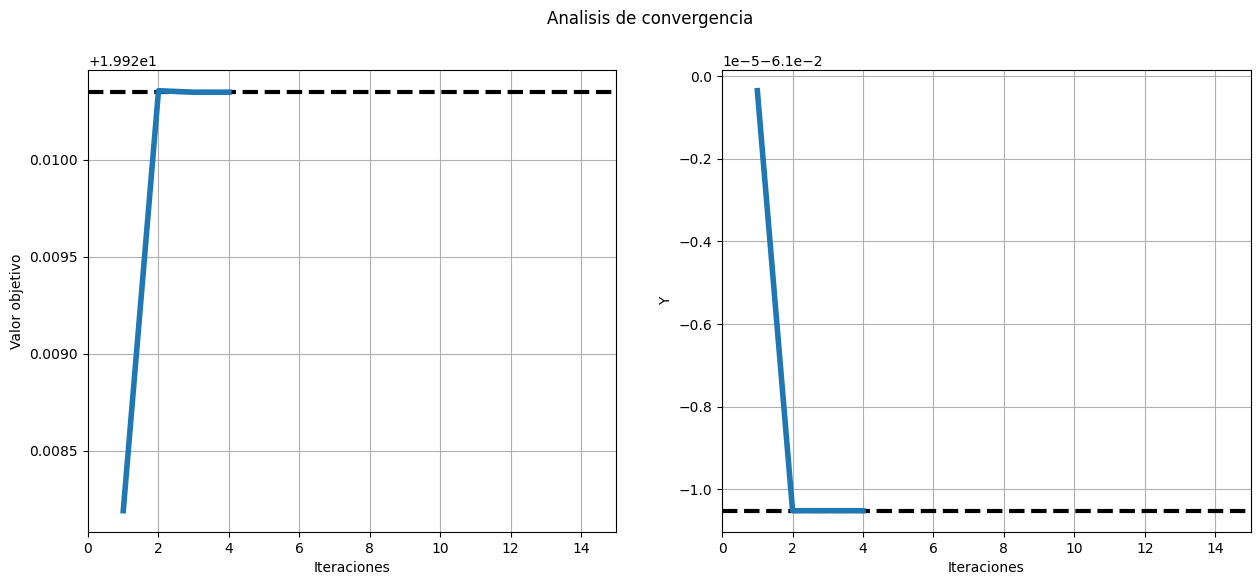

In [174]:
eval(reg1_MN,reg1_MN[-1][1],reg1_MN[-1][2])
eval(reg2_MN,reg2_MN[-1][1],reg2_MN[-1][2])
eval(reg3_MN,reg3_MN[-1][1],reg3_MN[-1][2])
eval(reg4_MN,reg4_MN[-1][1],reg4_MN[-1][2])

Podemos notar que el método de Newton no es efectivo sobre funciones discontinuas, esto es debido a que:

**Teorema del Método de Newton para Convergencia de Raíces**

Sea $ f \in C^2([a, b]) $. Si $ p \in [a, b] $ es tal que $ f(p) = 0 $ y $ f'(p) \neq 0 $, entonces existe un $ r > 0 $ tal que si $ |x_0 - p| < r $, entonces la sucesión $ x_n $ con $ x \in [a, b] $ verifica que:

$$
|x_n - p| < r \quad \forall n \in \mathbb{N}
$$

y $ x_n $ tiende a $ p $ cuando $ n $ tiende a infinito.

Si además $ f \in C^3([a, b])$, entonces la convergencia es cuadrática.


Puesto que las funciones no son continuas, entonces el método no es aplicable, el comportamiento esperado es que, los valores obtenidos se "disparen" a infinito como se muestra en la tabla

# Método de la secante

In [227]:
def Secante(U, d1U, a, b, epsilon=0.01, max_iter=100):
    x = sympy.symbols('x')
    U_func = sympy.lambdify(x, U, 'numpy')
    d1U_func = sympy.lambdify(x, d1U, 'numpy')

    cont = 0
    registro = []
    
    while cont < max_iter:
        # Calcular f'(a)
        dU_a = d1U_func(a)
        
        # Calcular f'(b)
        dU_b = d1U_func(b)
        
        # Calcular alpha
        alpha = b - dU_b / ((dU_b - dU_a)/(b - a))
        dU_alpha = d1U_func(alpha)
        
        if dU_alpha > 0:
            b = alpha
        else:
            a = alpha
            
        U_alpha = U_func(alpha)
        
        cont += 1
        registro.append([cont, alpha, U_alpha])
        print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(cont, alpha, U_alpha))
        if np.abs(dU_alpha) <= epsilon:
            break
    print("------------------------------------------------------------------------")
        
        
    
    return registro

In [229]:
reg1_MS=Secante(f1, df1,0,10)
reg2_MS=Secante(f2, df2,-2,10) 
reg3_MS=Secante(f3, df3,-2,10)
reg4_MS=Secante(f4, df4,-2,10) 

It: 01 - Temp: -0.0072202166 - Costo: 0.0460423158
It: 02 - Temp: -0.0143933229 - Costo: 0.0914523631
It: 03 - Temp: -0.0215193235 - Costo: 0.1362352743
It: 04 - Temp: -0.0285982337 - Costo: 0.1803962892
It: 05 - Temp: -0.0356300789 - Costo: 0.2239407486
It: 06 - Temp: -0.0426148940 - Costo: 0.2668740868
It: 07 - Temp: -0.0495527241 - Costo: 0.3092018256
It: 08 - Temp: -0.0564436231 - Costo: 0.3509295676
It: 09 - Temp: -0.0632876544 - Costo: 0.3920629897
It: 10 - Temp: -0.0700848900 - Costo: 0.4326078377
It: 11 - Temp: -0.0768354105 - Costo: 0.4725699194
It: 12 - Temp: -0.0835393050 - Costo: 0.5119550999
It: 13 - Temp: -0.0901966705 - Costo: 0.5507692950
It: 14 - Temp: -0.0968076117 - Costo: 0.5890184666
It: 15 - Temp: -0.1033722413 - Costo: 0.6267086170
It: 16 - Temp: -0.1098906789 - Costo: 0.6638457838
It: 17 - Temp: -0.1163630514 - Costo: 0.7004360354
It: 18 - Temp: -0.1227894926 - Costo: 0.7364854656
It: 19 - Temp: -0.1291701427 - Costo: 0.7720001899
It: 20 - Temp: -0.1355051487 - 

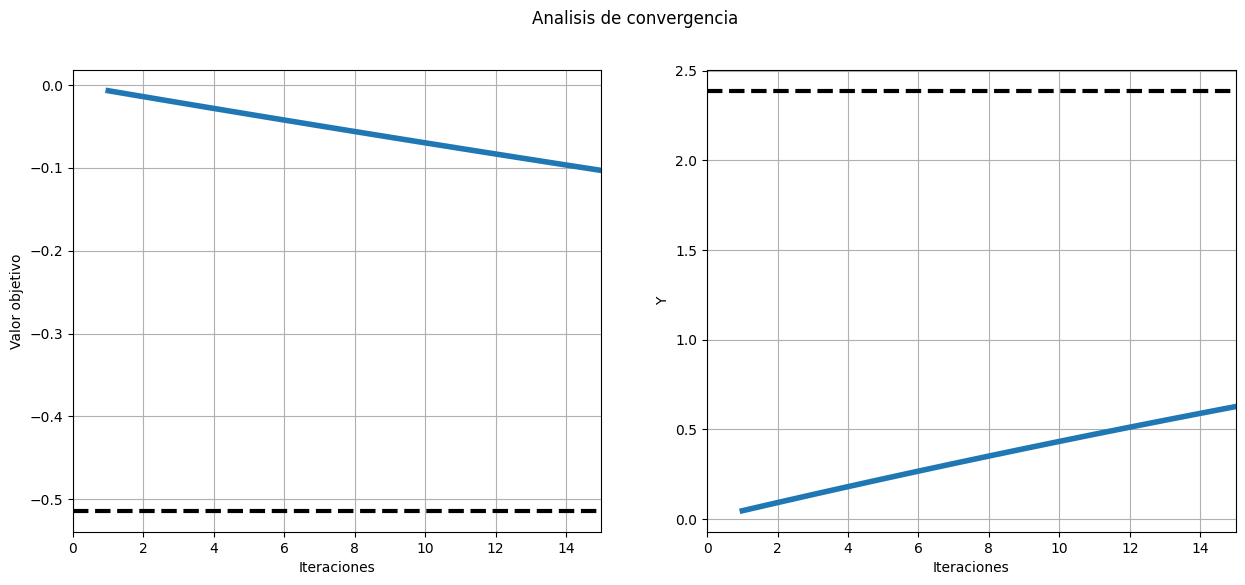

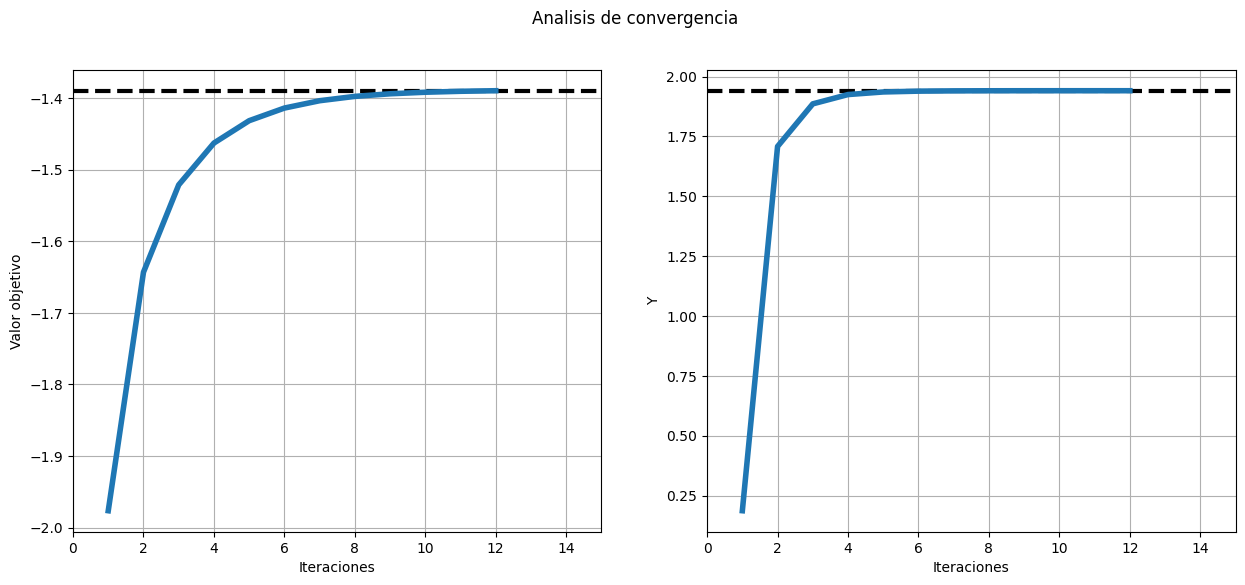

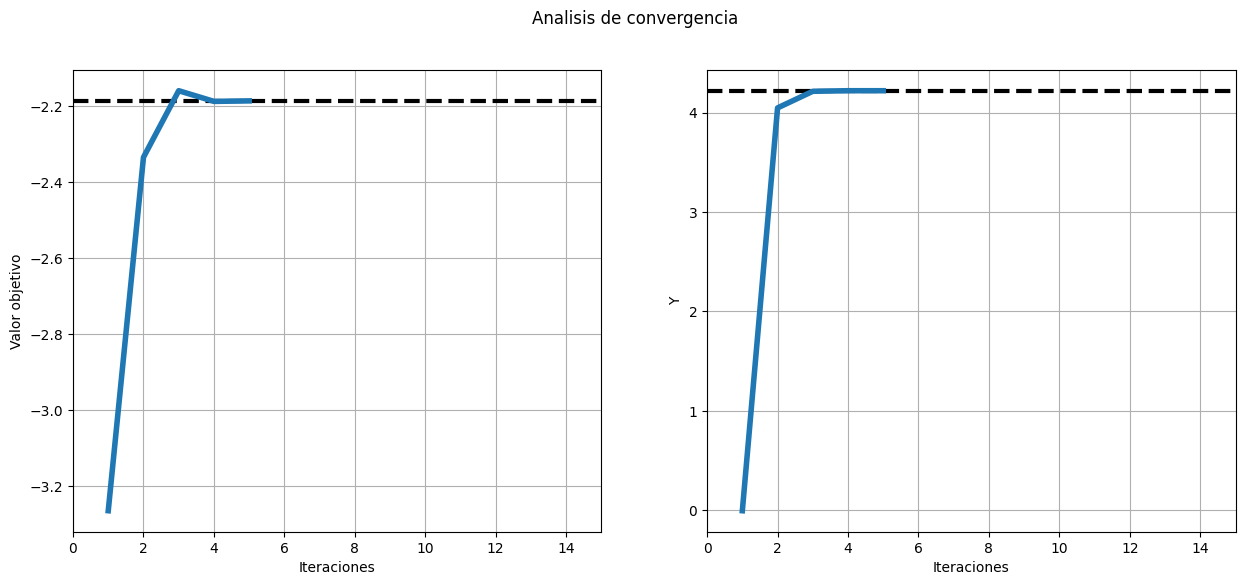

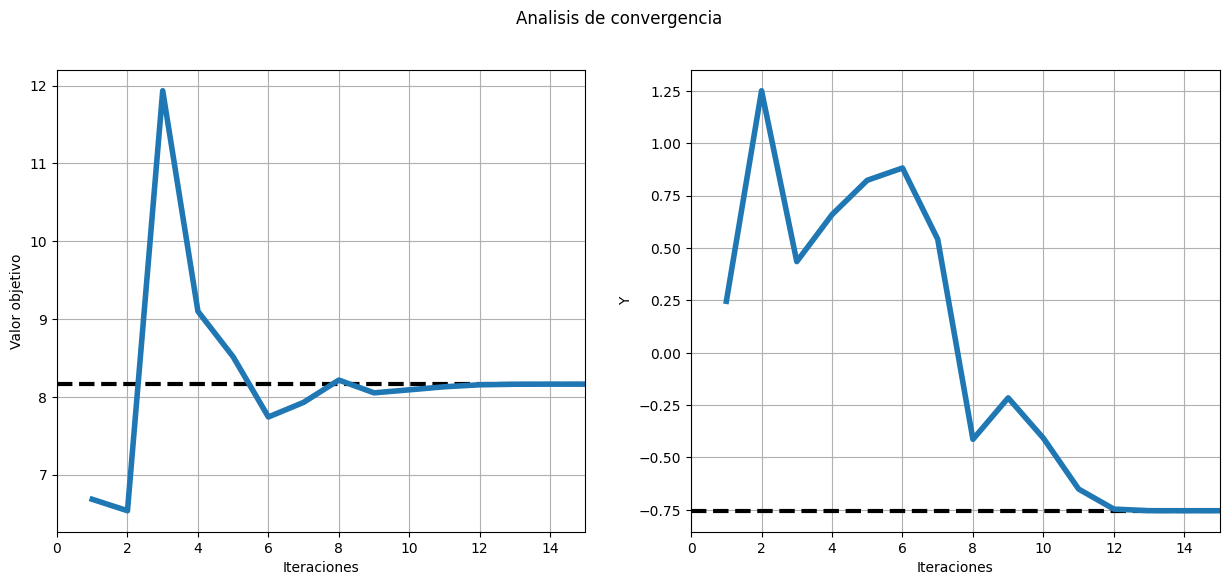

In [230]:
eval(reg1_MS,reg1_MS[-1][1],reg1_MS[-1][2])
eval(reg2_MS,reg2_MS[-1][1],reg2_MS[-1][2])
eval(reg3_MS,reg3_MS[-1][1],reg3_MS[-1][2])
eval(reg4_MS,reg4_MS[-1][1],reg4_MS[-1][2])

# Método de la sección dorada

#### No hace uso de derivadas

In [242]:
def GoldenSectionSearch(U, a, b, epsilon=1e-6, max_iter=100):
    x = sympy.symbols('x')
    U_func = sympy.lambdify(x, U, 'numpy')

    tau = 2 - 1.618033988
    
    cont = 0
    registro = []

    while cont < max_iter:
        # Calcular alpha1 y alpha2
        alpha1 = a*(1 - tau) + b*tau
        alpha2 = a*tau + b*(1 - tau)

        # Calcular U(alpha1) y U(alpha2)
        U_alpha1 = U_func(alpha1)
        U_alpha2 = U_func(alpha2)
        
        if U_alpha1 > U_alpha2:
            a = alpha1
        else:
            b = alpha2       

        cont += 1
        registro.append([cont, (a + b) / 2, U_func((a + b) / 2)])
        print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(cont, (a + b) / 2, U_func((a + b) / 2)))

        if np.abs(U_alpha1 - U_alpha2) < epsilon:
            break
    print("-------------------------------------------------------")
            
    return registro

In [262]:
reg1_MSD=GoldenSectionSearch(f1,-5,5)
reg2_MSD=GoldenSectionSearch(f2,-3,3)
reg3_MSD=GoldenSectionSearch(f3,-5,0)
reg4_MSD=GoldenSectionSearch(f4,-5,5)
reg5_MSD=GoldenSectionSearch(g_1,-5,5)
reg6_MSD=GoldenSectionSearch(g_2,-5,5)
reg7_MSD=GoldenSectionSearch(g_4,-3,3)


It: 01 - Temp: 1.9098300600 - Costo: -13.9157176204
It: 02 - Temp: 3.0901699484 - Costo: -5.2170463889
It: 03 - Temp: 2.3606797800 - Costo: -12.9936069931
It: 04 - Temp: 1.9098300620 - Costo: -13.9157176229
It: 05 - Temp: 2.1884705112 - Costo: -13.7104838373
It: 06 - Temp: 2.0162612431 - Costo: -13.9714243408
It: 07 - Temp: 1.9098300624 - Costo: -13.9157176235
It: 08 - Temp: 1.9756081495 - Costo: -13.9690672648
It: 09 - Temp: 2.0162612430 - Costo: -13.9714243409
It: 10 - Temp: 1.9911362495 - Costo: -13.9727684976
It: 11 - Temp: 2.0066643494 - Costo: -13.9730132020
It: 12 - Temp: 1.9970674559 - Costo: -13.9732714450
It: 13 - Temp: 2.0029986623 - Costo: -13.9732685588
It: 14 - Temp: 1.9993329751 - Costo: -13.9733301302
It: 15 - Temp: 2.0015984944 - Costo: -13.9733149311
It: 16 - Temp: 2.0001983265 - Costo: -13.9733330501
It: 17 - Temp: 1.9993329751 - Costo: -13.9733301302
It: 18 - Temp: 1.9998677917 - Costo: -13.9733332075
It: 19 - Temp: 2.0001983265 - Costo: -13.9733330501
-------------

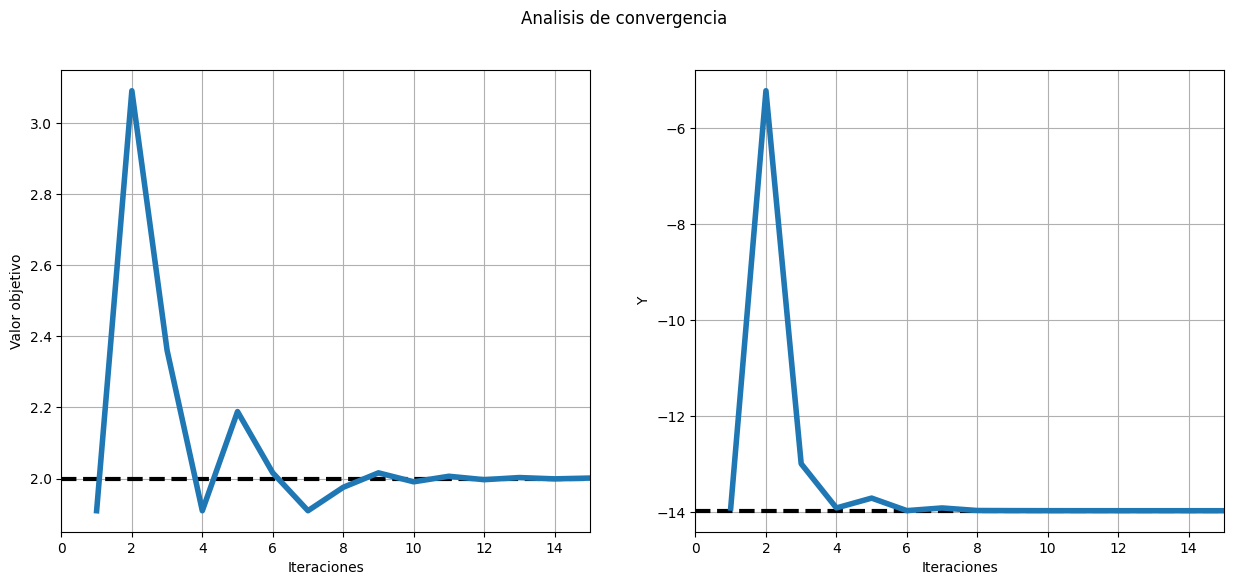

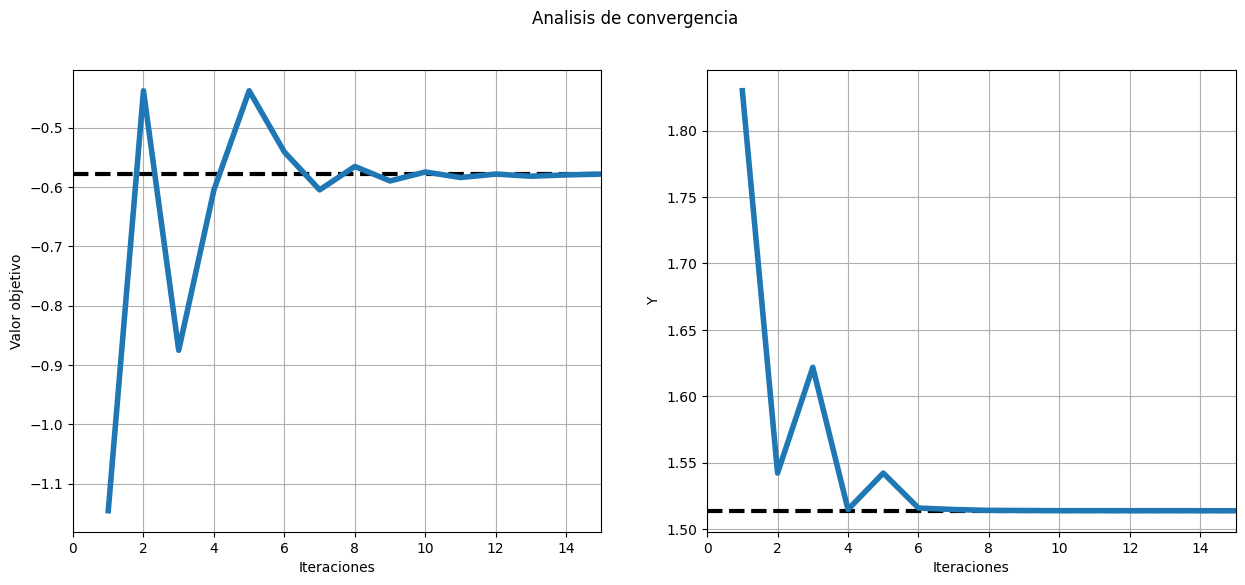

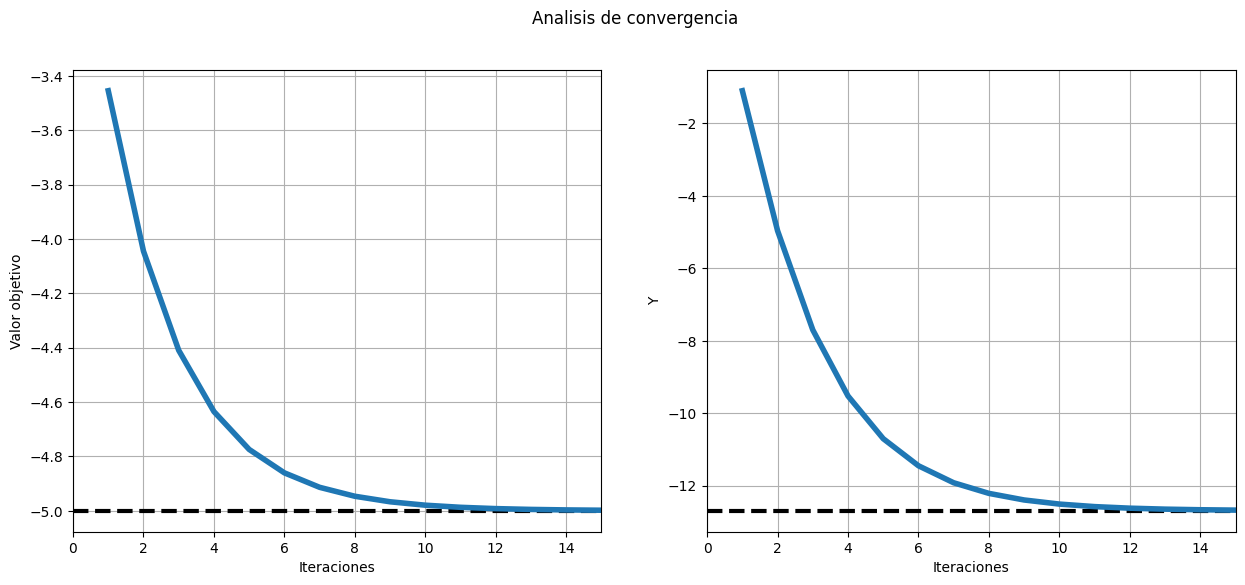

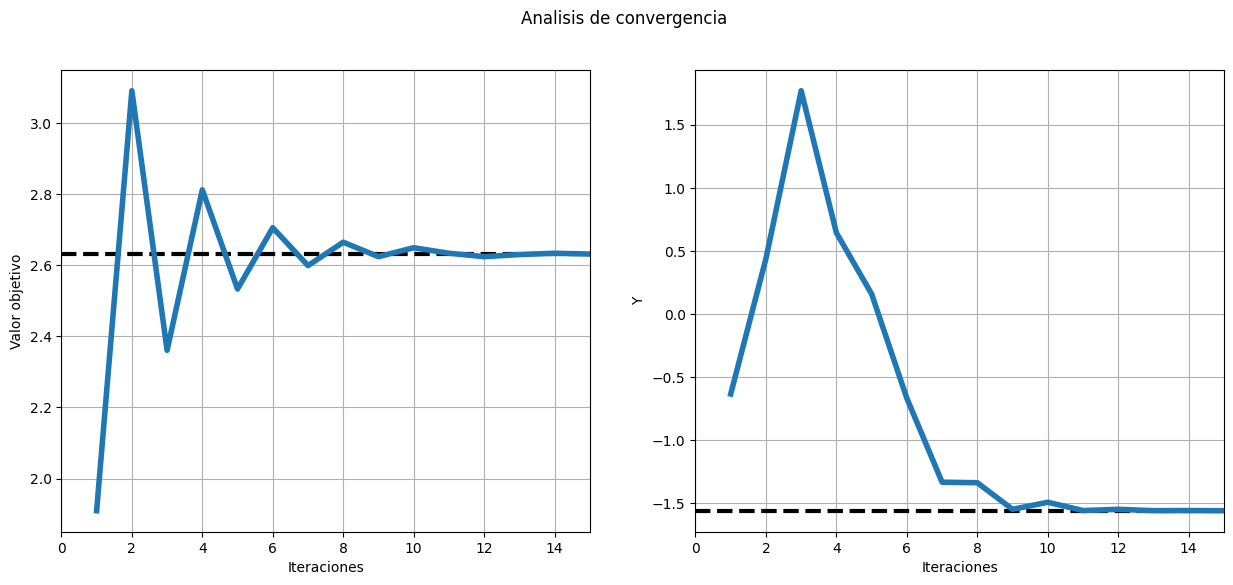

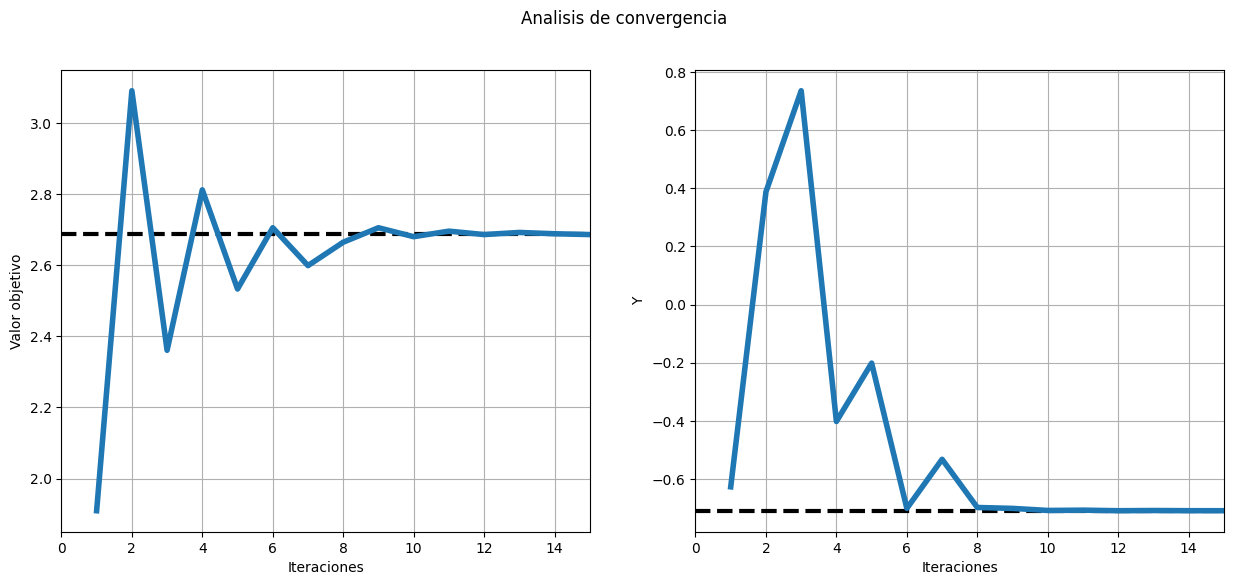

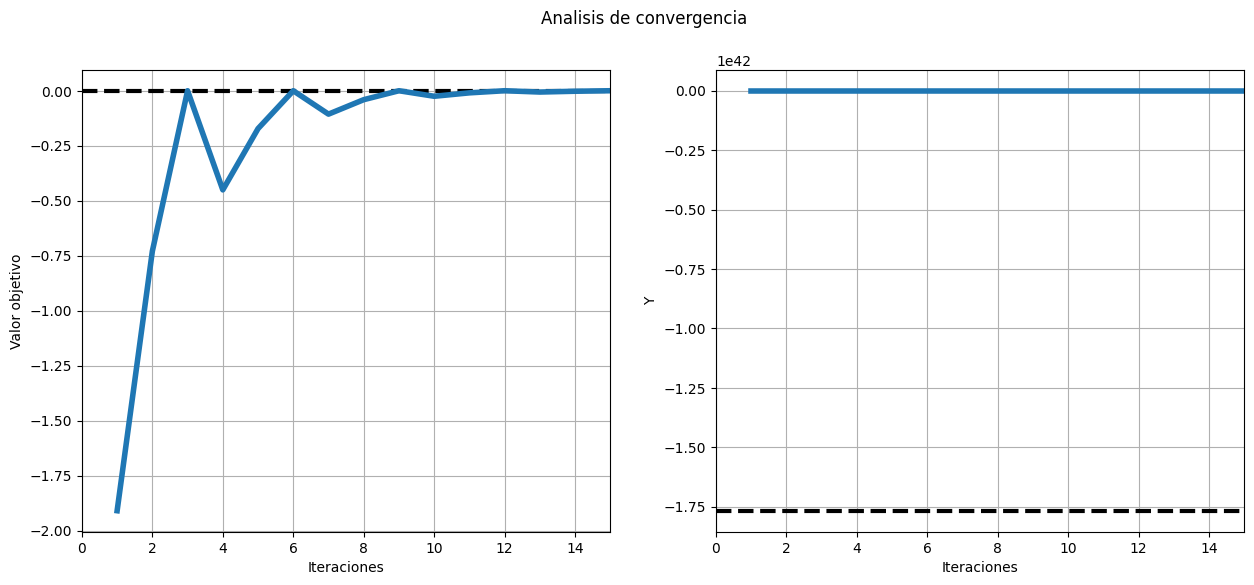

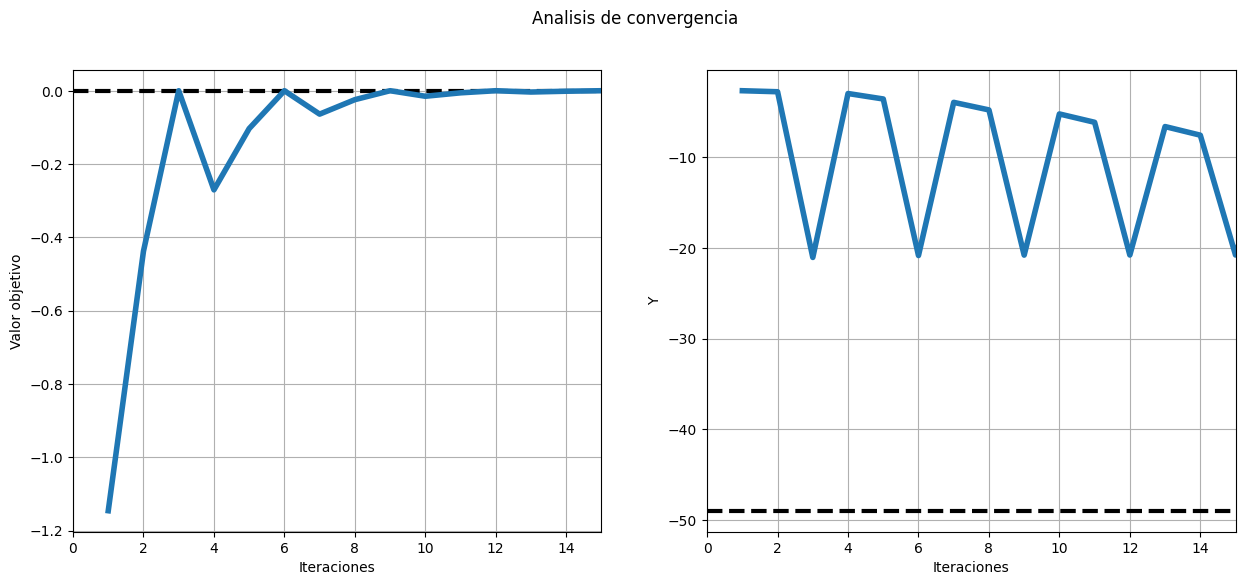

In [263]:
eval(reg1_MSD,reg1_MSD[-1][1],reg1_MSD[-1][2])
eval(reg2_MSD,reg2_MSD[-1][1],reg2_MSD[-1][2])
eval(reg3_MSD,reg3_MSD[-1][1],reg3_MSD[-1][2])
eval(reg4_MSD,reg4_MSD[-1][1],reg4_MSD[-1][2])
eval(reg5_MSD,reg5_MSD[-1][1],reg5_MSD[-1][2])
eval(reg6_MSD,reg6_MSD[-1][1],reg6_MSD[-1][2])
eval(reg7_MSD,reg7_MSD[-1][1],reg7_MSD[-1][2])

# Conclusiones

Pese a que la busqueda de la sección dorada no requiere calcular derivadas, solamente tuvo un buen desempeño para encontrar el mínimo de la función $f_1$, respecto a las demás solo pudo converger a algún mínimo local dependiendo de intervalo de búsqueda que se le asigne al algorítmo. Pudimos observar que el método de newton fue aquel que tuvo "mejor" desempeño al aplicarlo a aquellas funciones continuas ($f_1,...,f_4$), sin embargo, exhibe una dependecia fuerte al punto inicial que se le de, de hecho, dependiendo del punto inical que se de, puede o no converger al mínimo global o local, si es que existe (según el teorema que se enunció. De manera general, los métodos de optimización clásica unidimensionales, pueden llegar a tener dificultades dependiendo de la naturaleza de la función, especialmente cuando se tienen funciones "mal portadas" es decir, poseen discontinuidades numerables, no son diferenciales, "oscilan mucho", etc. Justo como se trabaja en el artículo mostrado, los algorítmos genéticos son una meta-heurística de gran utilidad para atacar problemas de optimización, particularmente, en nuestro caso, problemas de optimización de una variable respecto a funciones "con patologías". Incluso son de gran utilidad para problemas de optimización multivariable en espacios de búsqueda continuos, existen paradigmas cómo la **evolución diferencial** que atacan problemas de optimización no lineal dando una aproximación bastante razonable al problema que se de (siempre y cuando cumpla las condiciones requeridas para aplicar dicho paradigma).